
<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/14zSOmdu6bdqw-uaDRTpgRnSfsDi90DbU/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>
    
---

# <strong>Los datos hablan I</strong>

En este Notebook, realizaremos una **visualización gráfica** de los datos de temperatura obtenidos de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) meteorológicas de la red RACIMO-Móncora para un periodo de tiempo determinado. Para esto, utilizaremos pricipalmente las librerias de Python [MakeSens](https://docs.makesens.co/help/api-sdk/makesensapi-en-python) para acceder a los datos, [Pandas](https://pandas.pydata.org/) para manejarlos y [Matplotlib](https://matplotlib.org/) para visualizarlos.



# **Aspectos básicos**

## **1. Obtención de datos**

Mediante el uso de la API de MakeSens (libreria de python) descargamos los datos de una de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) de la red de RACIMO-Móncora. 

Para esto definimos:
* Rango de tiempo con fechas en el formato: `%Y-%m-%d %H:%M:%S` Por ejemplo: `2023-08-01 00:00:00`
* Identificación de la estación `mE1_00004`
* Frecuencia de muestreo: `m`, `h`, `d`, `w`.

Frecuencias de muestreo:
||Significado|
|--|--|
|`m`|minutos|
|`h`|horas|
|`d`|días|
|`w`|semanas|

Estaciones:
|`ID`|Colegio|
|--|--|
|`mE1_00004`|Instituto Técnico Damaso Zapata|
|`mE1_00005`|Colegio Santander|
|`mE1_00006`|Institución Educativa Nuestra Señora del Pilar|
|`mE1_00007`|Escuela Normal Superior|
|`mE1_00008`|Fundación Colegio UIS|
|`E2_00023`|Grupo Halley-UIS|


Luego, utilizamos la función download_data:
```
from MakeSens import MakeSens
data = MakeSens.download_data('mE1_00007', '2023-04-30 00:00:00', '2023-05-07 23:00:00', 'm')
```

Para más información sobre la API de MakeSens, puedes consultar la [documentación](https://docs.makesens.co/help/api-sdk/makesensapi-en-python).

In [ ]:
!pip install APIMakeSens

In [1]:
from MakeSens import MakeSens
import numpy as np
import pandas as pd

**Libreria MakeSens**

In [2]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-08-06 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-08-10 00:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo
frec  = 'm'                      # m: minutos, h: horas, d: días

data = MakeSens.download_data(estacion, start, end,frec) # Descargar los datos

Veámos los datos:

In [3]:
data

,humedad2,iluminancia,temperatura2,humedad,temperatura,presion,pm_n_2_5_2,pm25_1,pm25_2,pm1_1_AE,...,pm_n_0_3_1,pm_n_5_0_1,pm_n_5_0_2,pm10_2,pm10_1,pm25_2_AE,pm_n_1_0_1,pm_n_1_0_2,longitud,latitud
2023-08-06 00:00:00,41.297016,272.0,37.328907,36.225246,38.408794,656.677063,9.0,29.0,24.0,17.0,...,3396.0,2.0,0.0,24.0,31.0,24.0,172.0,182.0,None,None
2023-08-06 00:02:00,41.402306,273.0,37.302204,36.032043,38.408794,656.760193,7.0,18.0,17.0,14.0,...,2934.0,0.0,2.0,18.0,19.0,17.0,102.0,90.0,None,None
2023-08-06 00:04:00,41.177998,270.0,37.246128,35.968632,38.336823,659.901794,9.0,17.0,17.0,14.0,...,2460.0,0.0,0.0,17.0,17.0,17.0,104.0,106.0,None,None
2023-08-06 00:06:00,41.191730,274.0,37.371632,36.049122,38.444778,655.134033,10.0,17.0,19.0,13.0,...,2598.0,2.0,0.0,19.0,18.0,19.0,106.0,100.0,None,None
2023-08-06 00:08:00,41.326008,274.0,37.358280,36.049473,38.419075,656.304504,9.0,18.0,17.0,15.0,...,2838.0,2.0,1.0,18.0,19.0,17.0,102.0,115.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09 23:51:00,38.023956,272.0,38.461128,32.384815,39.920193,589.970459,3.0,12.0,8.0,8.0,...,1776.0,0.0,0.0,8.0,12.0,8.0,80.0,49.0,None,None
2023-08-09 23:53:00,37.801174,270.0,38.616005,31.853399,40.012726,585.662964,9.0,10.0,9.0,8.0,...,1512.0,0.0,0.0,9.0,10.0,9.0,54.0,46.0,None,None
2023-08-09 23:55:00,37.782864,276.0,38.533226,31.982691,40.017868,585.432190,3.0,10.0,10.0,7.0,...,1668.0,2.0,0.0,10.0,11.0,10.0,68.0,66.0,None,None
2023-08-09 23:57:00,37.787441,270.0,38.477150,31.882933,40.007587,585.929871,3.0,10.0,10.0,8.0,...,1656.0,0.0,0.0,10.0,10.0,10.0,62.0,65.0,None,None


**Nota:** En total tenemos 32 columnas, en este enlace puedes conocer acerca de cada una de ellas: [Campo de datos](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos)

In [4]:
MakeSens.download_data('mE1_00008',          # Estacion
                    '2023-07-10 23:00:00',   # Inicio
                    '2023-08-10 23:00:00',   # Fin
                    'h')                     # Muestreo

,humedad2,iluminancia,temperatura2,humedad,temperatura,presion,pm_n_2_5_2,pm25_1,pm25_2,pm1_1_AE,...,pm_n_0_3_1,pm_n_5_0_1,pm_n_5_0_2,pm10_2,pm10_1,pm25_2_AE,pm_n_1_0_1,pm_n_1_0_2,longitud,latitud
2023-07-10 23:00:00,43.003607,365.379310,37.393733,37.465731,38.675942,643.771329,4.103448,8.068966,7.965517,6.137931,...,1395.724138,0.827586,0.517241,8.275862,8.827586,7.965517,47.793103,47.206897,None,None
2023-07-11 00:00:00,42.332832,283.321429,36.999409,37.272648,38.049310,672.372537,4.321429,7.678571,7.607143,5.928571,...,1331.142857,0.428571,0.250000,7.892857,8.142857,7.607143,44.714286,45.785714,None,None
2023-07-11 01:00:00,49.882953,285.241379,33.422309,47.662744,33.254015,848.489757,3.448276,9.103448,8.517241,7.241379,...,1567.448276,0.827586,0.344828,8.827586,9.965517,8.517241,51.448276,48.965517,None,None
2023-07-11 02:00:00,54.101625,285.000000,31.472788,54.018758,30.612820,928.858252,3.766667,8.633333,8.066667,6.733333,...,1529.000000,0.666667,0.466667,8.566667,9.166667,8.066667,48.666667,46.533333,None,None
2023-07-11 03:00:00,55.252655,283.827586,31.154187,55.294506,30.278955,937.576626,4.379310,8.862069,8.517241,6.827586,...,1519.241379,0.758621,0.689655,9.068966,9.586207,8.517241,54.620690,52.931034,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-10 18:00:00,36.552224,68067.892857,35.733959,35.537947,34.751768,800.285590,5.214286,9.678571,9.035714,7.321429,...,1572.428571,0.714286,0.214286,9.285714,10.357143,9.035714,56.714286,55.000000,None,None
2023-08-10 19:00:00,33.646878,106779.444444,38.146226,32.264552,37.134657,708.205648,4.888889,9.777778,9.111111,7.185185,...,1568.444444,0.444444,0.555556,9.592593,10.370370,9.111111,63.481481,54.185185,None,None
2023-08-10 20:00:00,48.036927,37242.620690,34.128289,47.507499,33.120190,849.375518,3.586207,7.275862,6.551724,5.448276,...,1256.896552,0.896552,0.413793,6.862069,8.241379,6.551724,46.758621,41.448276,None,None
2023-08-10 21:00:00,53.997570,17764.423077,31.687633,54.057072,30.666938,925.089161,3.538462,6.038462,5.576923,4.538462,...,1147.384615,0.692308,0.269231,5.923077,6.730769,5.576923,38.615385,36.153846,None,None


In [5]:
cols = ["temperatura", "temperatura2"]
data[cols]

,temperatura,temperatura2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


In [7]:
temp = data[["temperatura", "temperatura2"]].copy()
temp

,temperatura,temperatura2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


## **2. Manejo de datos**



Una vez que descargamos el DataFrame con todos los datos de la estación, seleccionaremos los datos de temperatura en las columnas *"temperatura"* y *"temperatura2"* y los almacenaremos en un nuevo DataFrame: ``` temp ```

> ¿Por qué tenemos dos columnas de temperatura?

 Luego, renombraremos las columnas para que tengan nombres más cortos y entendibles. Finalmente, convertiremos el índice de los datos a formato de fecha y hora con la función ```to_datetime()``` para manejarlos facilmente y utilizarlos en la visualización.

**Copiamos dataset**

* Debemos copiar el dataset para evitar errores de sincronización de datos con el dataset viejo.
* Renombramos las columnas por comodidad

In [8]:
## 1ra forma
temp = data[['ts',"temperatura", "temperatura2"]].copy()   # Seleccionamos Tiempo, Temperatura 1, Temperatura 2
temp.columns = ['ts',"T1", "T2"]                           # Renombramos las columnas
temp.index = temp['ts']                                    # Seleccionamos índices
del temp['ts']                                             # Borramos columnas de índices
temp

,T1,T2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


In [ ]:
## 2da forma
temp = data[['ts',"temperatura", "temperatura2"]].copy()   # Seleccionamos Tiempo, Temperatura 1, Temperatura 2
temp.columns = ['ts', 'T1','T2']                           # Renombramos columnas
temp = temp.set_index('ts')                                # Fijamos índices
temp

**Convertimos índice en formato de fecha**

* Esto nos permite hacer cosas interesantes

In [9]:
temp.index

Index(['2023-08-06 00:00:00', '2023-08-06 00:02:00', '2023-08-06 00:04:00',
       '2023-08-06 00:06:00', '2023-08-06 00:08:00', '2023-08-06 00:10:00',
       '2023-08-06 00:12:00', '2023-08-06 00:14:00', '2023-08-06 00:16:00',
       '2023-08-06 00:18:00',
       ...
       '2023-08-09 23:41:00', '2023-08-09 23:43:00', '2023-08-09 23:45:00',
       '2023-08-09 23:47:00', '2023-08-09 23:49:00', '2023-08-09 23:51:00',
       '2023-08-09 23:53:00', '2023-08-09 23:55:00', '2023-08-09 23:57:00',
       '2023-08-09 23:59:00'],
      dtype='object', length=2621)

In [12]:
temp.index = pd.to_datetime(temp.index)   # Convertimos el indice a formato datetime

In [13]:
# Datos de un mes especifico
temp.loc['2023-08']

,T1,T2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


In [15]:
# Datos de un día especifico
temp.loc['2023-08-06']

,T1,T2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-06 23:49:00,39.370121,38.095291
2023-08-06 23:51:00,38.948578,37.964447
2023-08-06 23:53:00,39.066814,37.908371
2023-08-06 23:55:00,39.375263,38.402382


In [16]:
# Datos de una hora especifica de un día
temp.loc['2023-08-06 10']

,T1,T2
2023-08-06 10:02:00,27.423649,28.252460
2023-08-06 10:04:00,27.290005,28.313879
2023-08-06 10:06:00,27.433929,28.369955
2023-08-06 10:08:00,27.433929,28.340582
2023-08-06 10:10:00,27.459629,28.426031
2023-08-06 10:12:00,27.115240,27.985428
2023-08-06 10:14:00,26.611509,27.448692
2023-08-06 10:16:00,26.524128,27.365911
2023-08-06 10:18:00,26.313385,27.138933
2023-08-06 10:20:00,26.112923,26.954681


# **Análisis de datos**

## **1. Promedio por sensores y por día**
**¿Los datos de temperatura miden lo mismo?**

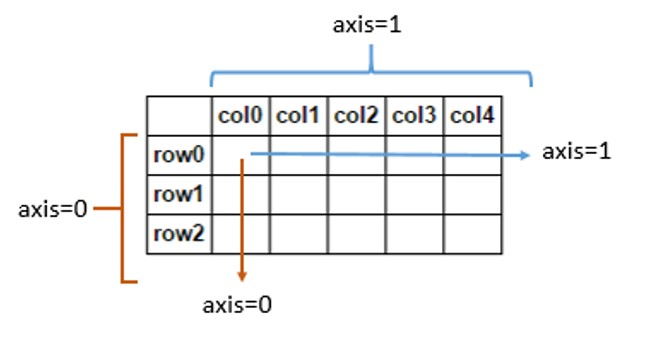

**Promedio**

In [17]:
# Agregamos la columna de promedio
temp['mean'] = temp[['T1','T2']].mean(axis=1)    # 1ra forma
temp['mean'] = (temp['T1'] + temp['T2'])/2       # 2da forma

# Cualquiera de las dos formas es válida, la primera es más general, y la segunda más simple
temp

,T1,T2,mean
2023-08-06 00:00:00,38.408794,37.328907,37.868851
2023-08-06 00:02:00,38.408794,37.302204,37.855499
2023-08-06 00:04:00,38.336823,37.246128,37.791476
2023-08-06 00:06:00,38.444778,37.371632,37.908205
2023-08-06 00:08:00,38.419075,37.358280,37.888678
...,...,...,...
2023-08-09 23:51:00,39.920193,38.461128,39.190660
2023-08-09 23:53:00,40.012726,38.616005,39.314366
2023-08-09 23:55:00,40.017868,38.533226,39.275547
2023-08-09 23:57:00,40.007587,38.477150,39.242368


In [18]:
import matplotlib.pyplot as plt

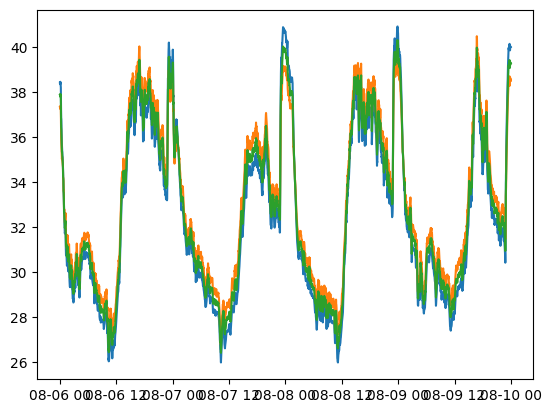

In [19]:
plt.plot(temp['T1'])
plt.plot(temp['T2'])
plt.plot(temp['mean'])

**Promedio diario**

La funcion `.resample('d')` permite agrupar los datos por día `'d'`, mes `'m'` u hora `'h'` entre otros. Veamos como funciona.

In [20]:
temp_mean = temp['mean']

In [21]:
temp_mean_h = temp_mean.resample('h').mean()

In [22]:
temp_mean_d = temp_mean.resample('d').mean()

Para más información sobre la función ```.resample()``` consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). 

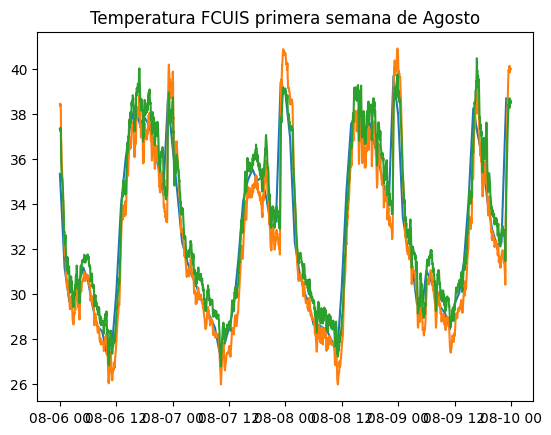

In [23]:
plt.plot(temp_mean_h.index, temp_mean_h)
plt.plot(temp.index, temp['T1'])
plt.plot(temp.index, temp['T2'])

plt.title('Temperatura FCUIS primera semana de Agosto')
plt.show()

Podemos mejorar la grafica en almenos los siguientes aspectos:
* Color de línea
* Tipo de línea
* Marcas de puntos

### **Visualización de datos Introducción básica**

In [24]:
import matplotlib.pyplot as plt

La estructura básica en `matplotlib.pyplot` es `plt.figure()`. Las `figures` son como los lienzos en blancos en donde vamos a hacer nuestras pinturas de visualización de datos. Son el background o fondo donde vamos a dibujar los trazos.

In [25]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

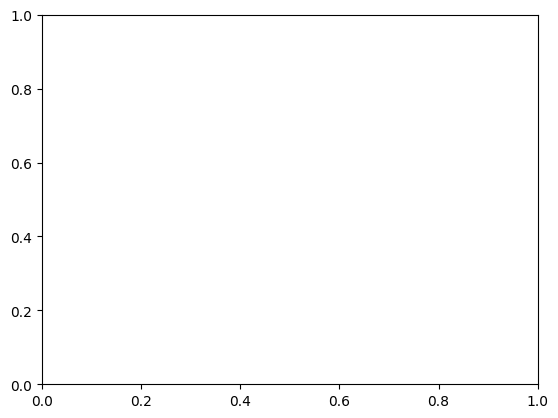

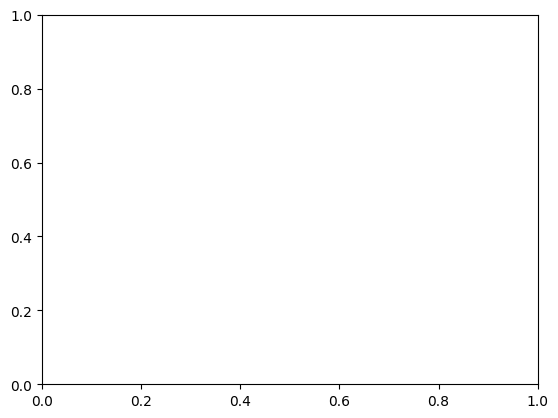

In [26]:
fig = plt.figure()
ax = fig.gca()       # gca() significa: Get the current axes -> Obten los ejes actuales
fig

En un lienzo de python podemos graficar puntos, líneas y sombreados.

In [27]:
# Datos
import numpy as np
x = np.linspace(0,10,20)
y = np.random.random(20)

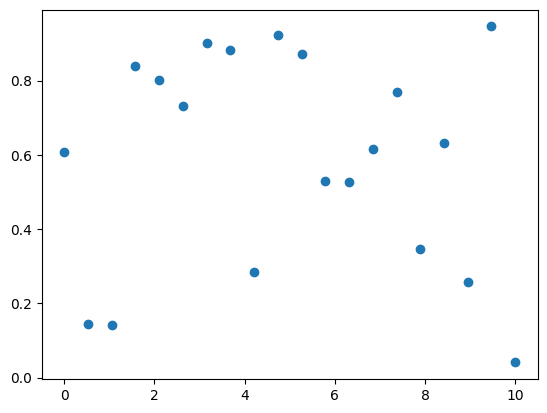

In [28]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o')

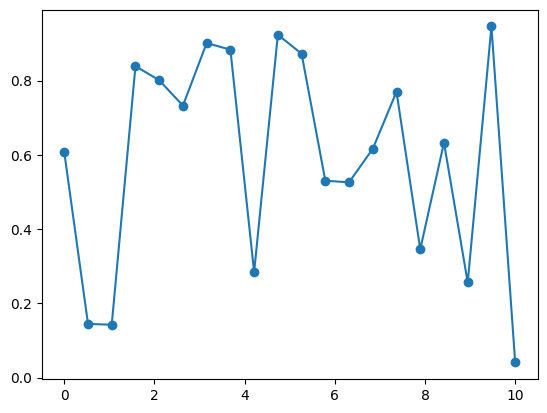

In [29]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o-')

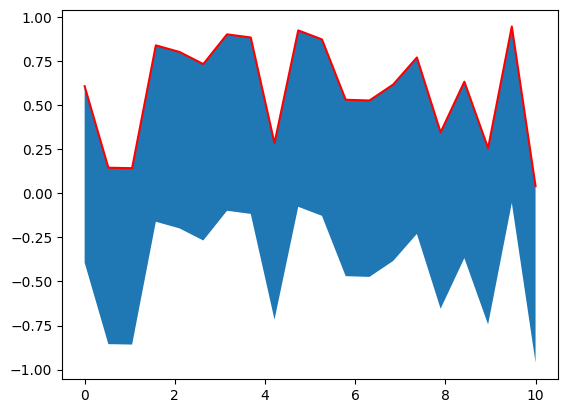

In [30]:
# Figura
fig = plt.figure()
plt.plot(x,y,'-',color='red')
plt.fill_between(x,y,y-1)

**Atributos de `plt.plot`**

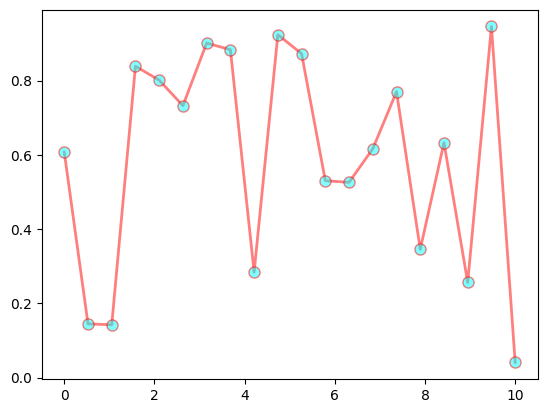

In [31]:
fig = plt.figure()
plt.plot(x,                        # Datos eje x
        y,                         # Datos eje y
       '-or',                      # Formato corto: 'linea-marcadores-color'
        markerfacecolor = 'cyan',  # Color marcador                             # mfc
        label = 'Datos',           # Etiquetas
        alpha = 0.5,               # Transparencia
        markersize = 8,           # Marker size -> tamaño marcadores           # ms
        linewidth  = 2)          # Linewidth -> grosor de línea               # lw

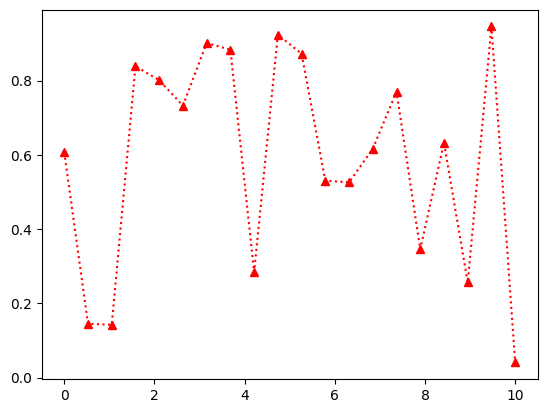

In [32]:
plt.plot(x,y,color='red',linestyle=':',marker='^')

Estilos de línea (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle))
|Estilo de línea|Significado|
|--|--|
|`-`|sólido|
|`--`|segmentado|
|`-.`|línea segmento-punto|
|`:`|línea punteada|
|` `|no línea|

Estilos de marcadores (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle))
|Marcador|Significado|
|--|--|
|`.`|punto|
|`,`|pixel|
|`o`|círculo|
|`v`|triángulo abajo|
|`^`|triángulo arriba|
|`<`|triángulo izquierda|
|`>`|triángulo derecha|
|`*`|estrella|
|`h`|hexágono|
|`p`|pentágono|

Estilos de colores (ver más [aquí](https://matplotlib.org/stable/gallery/color/named_colors.html))
|Denominacion|Color [inglés]|Color  [español]|
|--|--|--|
|`b`|blue|azúl|
|`r`|red|rojo|
|`g`|green|verde|
|`c`|cyan|celeste|
|`m`|magenta|magenta|
|`y`|yellow|amarillo|
|`k`|black|negro|
|`w`|white|blanco|
|`p`|pink|rosado|
|`violet`|violet|violeta|

En `matplotlib` también se puede usar el nombre del color (`green`) o su formato hexadécimal (`#008000`). Por ejemplo, valla a este [enlace](https://htmlcolorcodes.com/) para probar con diferentes colores en formato hexadécimal.

Aquí hay una documentación completa de [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

**Sub-gráficas**

Son otro aspecto importante que permite graficar varias imágenes una al lado de otra.

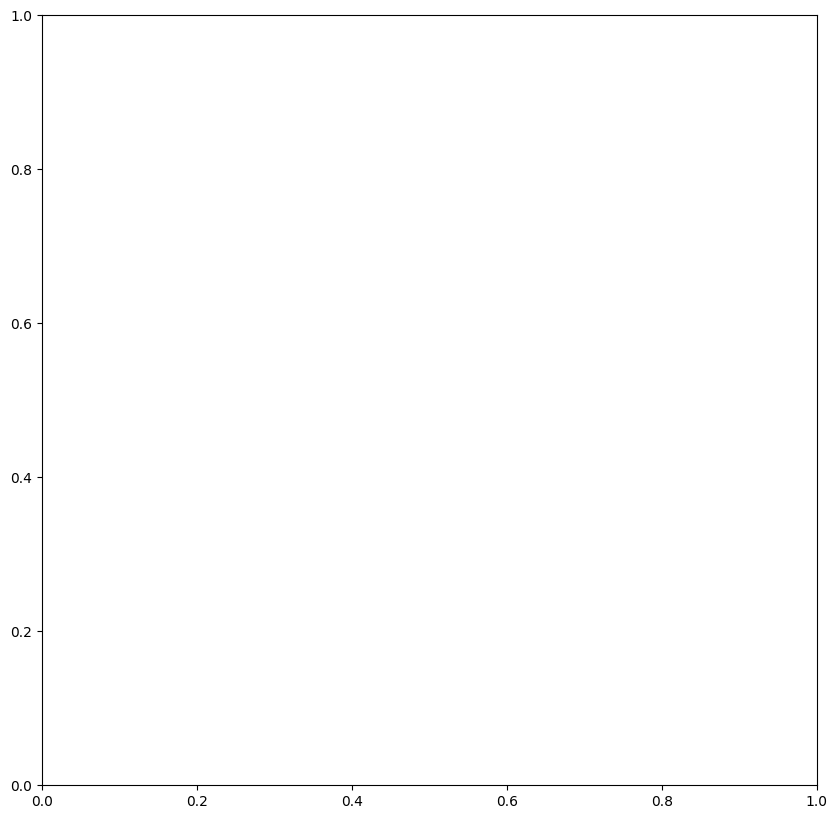

In [33]:
fig  = plt.figure(figsize=(10,10))
ax = fig.gca()

<Axes: >

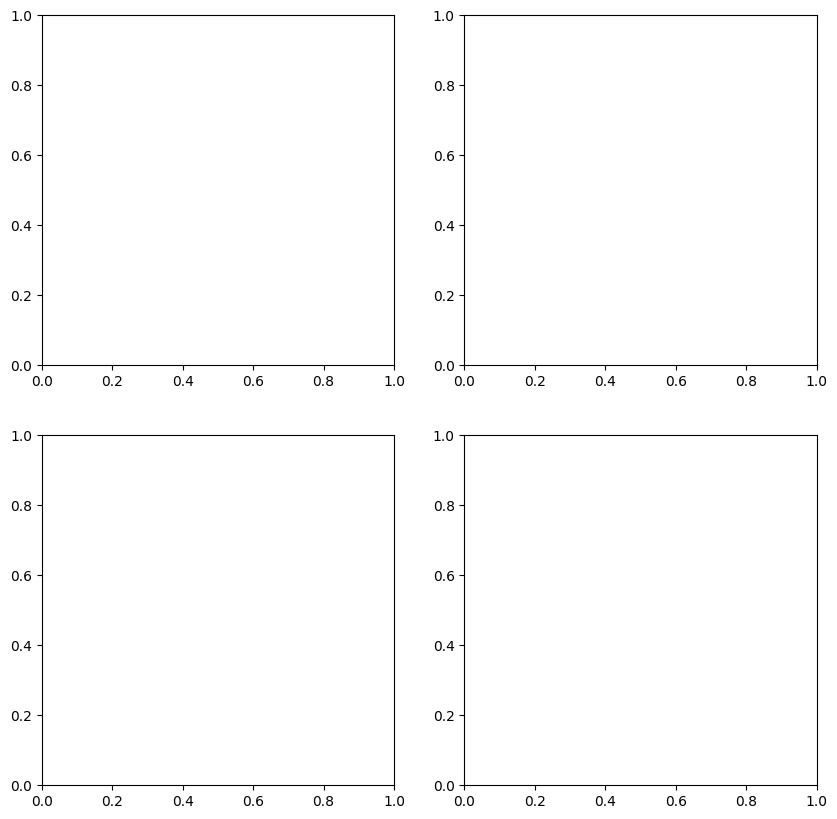

In [34]:
fig  = plt.figure(figsize=(10,10))
plt.subplot(221)
#plt.plot(x,y)

plt.subplot(222)
#plt.plot(x,y,'--*r')

plt.subplot(223)
#plt.plot(x,y,'.g',ms=10)

plt.subplot(224)
#plt.plot(x,y**2,'-.',ms=10)

### **Generación de gráficos**

In [39]:
## Datos
temp_h = temp.resample('h').mean()          # Remuestreo por hora
temp_d = temp.resample('d').mean()          # Remuestreo por día
temp_m = temp.resample('10 min').mean()     # Remuestreo por 10 minutos

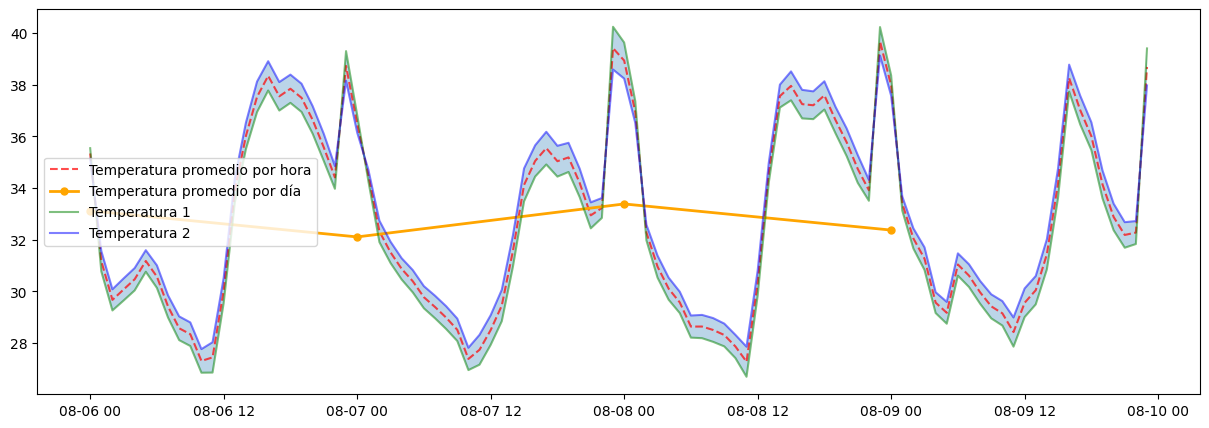

In [70]:
## Generamos la figura
fig = plt.figure(figsize=(15, 6))
ax = fig.gca()

# Graficamos los datos
plt.plot(temp_mean_h,  '--r', label="Temperatura promedio por hora", ms=4, alpha=0.7)
plt.plot(temp_mean_d,  '-o',  label="Temperatura promedio por día",  ms=5, lw=2, color="orange")
plt.plot(temp_h['T1'], "-g",  label="Temperatura 1",    alpha=0.5)
plt.plot(temp_h['T2'], "-b",  label="Temperatura 2",    alpha=0.5)
plt.fill_between(temp_h.index, y1 = temp_h.T1, y2 = temp_h.T2, alpha=0.3)

# Configuraciones finales
plt.legend()
plt.show()

**Mejoremos la grafica!**

In [ ]:
import matplotlib.dates as mdates

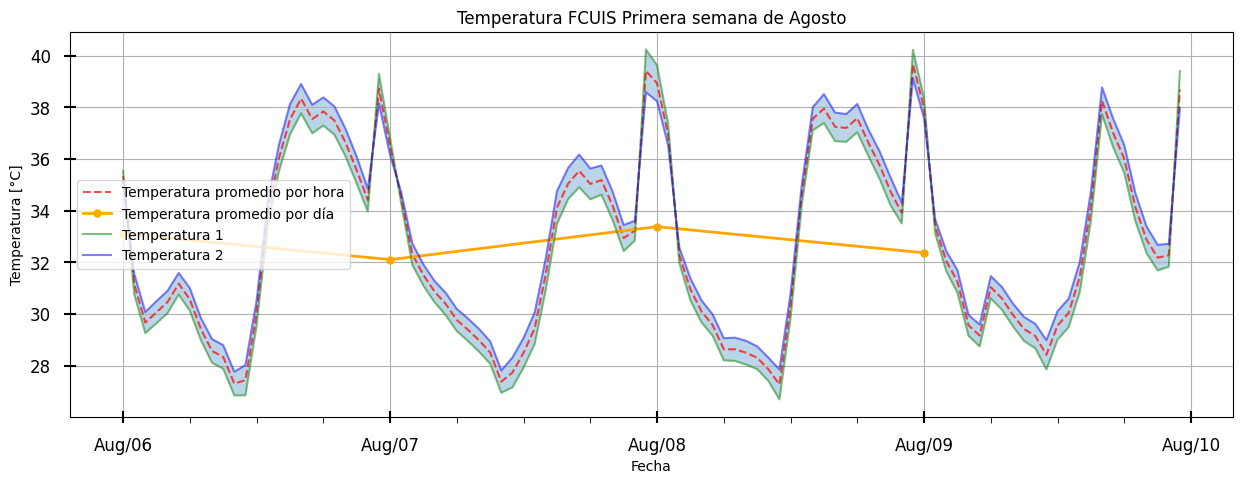

In [69]:
## Generamos la figura
fig = plt.figure(figsize=(15, 6))
ax = fig.gca()

# Graficamos los datos
plt.plot(temp_mean_h,  '--r', label="Temperatura promedio por hora", ms=4, alpha=0.7)
plt.plot(temp_mean_d,  '-o',  label="Temperatura promedio por día",  ms=5, lw=2, color="orange")
plt.plot(temp_h['T1'], "-g",  label="Temperatura 1",    alpha=0.5)
plt.plot(temp_h['T2'], "-b",  label="Temperatura 2",    alpha=0.5)
plt.fill_between(temp_h.index, y1 = temp_h.T1, y2 = temp_h.T2, alpha=0.3)

# Configuraciones finales
#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5) # Lineas o segmentos sobre el eje
ax.tick_params(which='minor', length=4)                         # Lineas o segmentos sobre los ejes 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))     # Formato de las fechas en el eje x
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posicióon de las ticks mayores
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posición de las ticks menores

#Agregamos la leyenda y los titulos
plt.xlabel('Fecha')
plt.ylabel("Temperatura [°C]")
plt.title("Temperatura FCUIS Primera semana de Agosto")
plt.grid(True)
plt.legend()

plt.show()

### **xaxis, Etiquetas y malla**

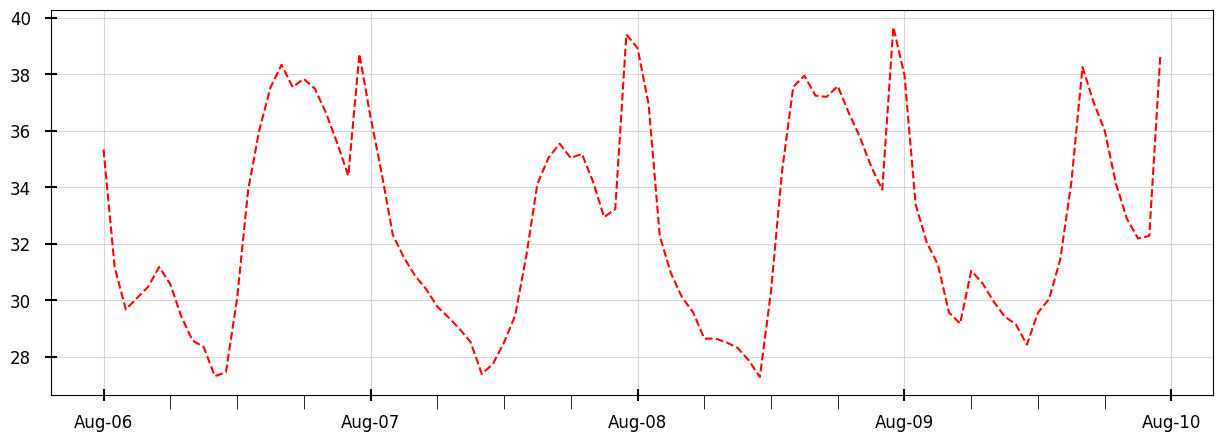

In [68]:
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

plt.plot(temp_mean_h, '--r')

#Malla
plt.grid(True, alpha=0.5, which='major')  # wich : ['major', 'minor', 'both']

#Dimensiones Ticks 
ax.tick_params( which='major',        # Major ticks: subdividen los ejes en unidades mayores
                pad=10,               # Distancia entre etiquetas y ticks
                width=1.5,            # Ancho del tick
                length=8,             # Largo del tick 
                direction="inout",    # 'inout': ticks en la mitad de los ejes, 'in': ticks adentro de los ejes, 'out': ticks afuera de los ejes 
                labelsize=12)         # Tamaño de letra de la etiqueta

ax.tick_params(which='minor',         # Minor ticks: subdividen las unidades mayores
                length=10)            # Largo del tick 

# Formato y posiciones de ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posiciona ticks mayores en cada día
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posiciona ticks menores en las horas 0.00 am, 6.00 am, 12.00 m, 6.00 pm

plt.show()


> `mdates.DateFormatter` solo funciona si el eje x dentro de `plot()` es un `DatetimeIndex` o si está en formato de fecha.

Formatos de fechas

|Directiva|Significado|Ejemplo|
|--|--|--|
|`%w`|Día de la semana como número decimal. 0 es domingo y 6 es sábado|0, ..., 6|
|`%d`|Día del mes como número decimal|01, 02, ..., 31|
|`%m`|Mes como número decimal|01, 02, ..., 12|
|`%y`|Año sin las centenas como número decimal|00, 01, ..., 99|
|`%b`|Mes como su nombre abreviado (en Inglés)|Jan, Feb, ..., Dec|
|`%a`|Día de la semana como su nombre abreviado (en Inglés)|Sun, Mon, ..., Sat|

[Tabla de formato de fechas](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [52]:
type(temp.index[0])

pandas._libs.tslibs.timestamps.Timestamp

## **2. Promedio por agrupamiento**
**¿Exite un ciclo diurno en la temperatura?**

En los datos podemos buscar comportamientos que varien durante periodos de tiempo determinado. Por ejemplo, podemos promediar el valor de la temperatura en todas las horas del dia buscando patrones. Para esto usamos a función ```.groupby()``` de Pandas.
> Para más información sobre la función groupby, consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

In [61]:
temp['hora'] = temp.index.hour.values # Agregamos una columna "hora" al DataFrame temp que contenga la hora de cada dato
horario_mean = temp['mean'].groupby(temp['hora']).mean()

In [62]:
horario_mean

hora
0     37.060717
1     34.058371
2     31.568860
3     30.958749
4     30.283479
5     30.099982
6     29.998419
7     29.494296
8     29.024227
9     28.650429
10    27.939261
11    27.729075
12    29.592904
13    31.982319
14    34.311418
15    35.980530
16    37.248647
17    36.826695
18    36.683496
19    35.901763
20    34.867783
21    33.960141
22    33.476945
23    39.128824
Name: mean, dtype: float64

### **La función `.gropuby()`**

Empleamos la función ```.groupby()``` para agrupar los datos por hora del día y obtener un único valor de temperatura por hora mediante la media aritmética de los datos. Esto nos permitirá visualizar los datos de temperatura de forma más clara con un dato para cada hora del día, el cual será más o menos representativo dependiendo del fenómeno que queramos analizar. Además de obtener el promedio de la temperatura para cada hora, también podemos obtener los valor máximos y mínimos registrados durante el periodo de tiempo analizado, esto con las funciones ```.max()``` y ```.min()``` de Pandas, respectivamente. 

In [63]:
# Agrupamos los valores de la temperatura por hora y promediamos para el promedio
horario = temp['mean'].groupby(temp['hora']).mean()
horario_1 = temp['T1'].groupby(temp['hora']).mean()
horario_2 = temp['T2'].groupby(temp['hora']).mean()

#También podemos obtener los valores máximos y minimos de temperatura durante la semana para cada hora del promedio
horario_max = temp['mean'].groupby(temp['hora']).max()
horario_min = temp['mean'].groupby(temp['hora']).min()

### **Generación de gráficas**

Una vez obtenidos los valores promedio de temperatura por hora, graficamos el promedio, el máximo y el mínimo de cada hora de la misma forma que en el proceso anterior.

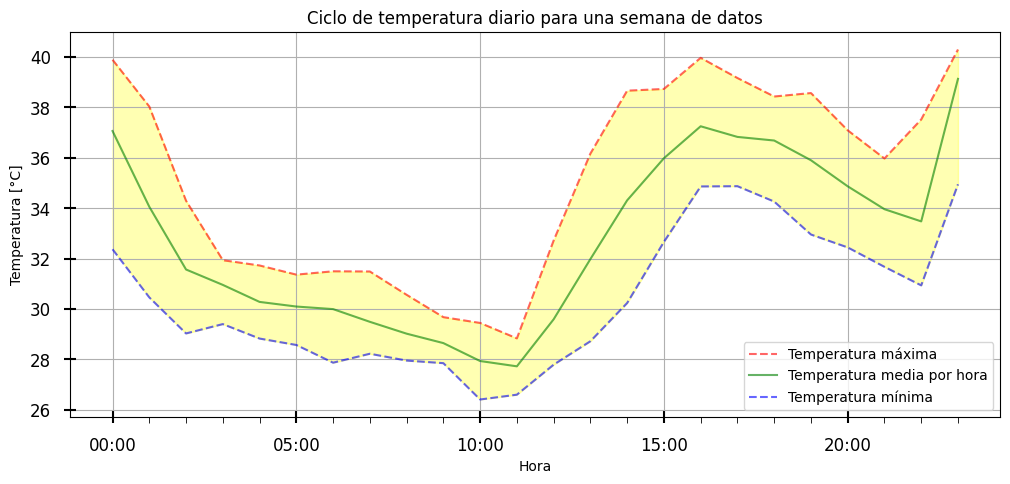

In [67]:
#Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(horario_max, '--r', label="Temperatura máxima",         alpha=0.6)
plt.plot(horario,     '-g',  label="Temperatura media por hora", alpha=0.6)
plt.plot(horario_min, '--b', label="Temperatura mínima",         alpha=0.6)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo de temperatura diario para una semana de datos")
plt.grid(True)
plt.legend()

plt.show()


> ¿Este ciclo tiene sentido para ti?  

>¿Cómo piensas que se modificaria la grafica si ampliamos el periodo de los datos?

## **3. Cuartiles y Digrama de Caja y Bigotes**

### **Cuartiles**

**¿Qué tan representativo es el promedio de cada hora respecto al comportamiento real?**

En este caso, con representativo nos referimos a que tan cercano es el promedio de cada hora a la temperatura real registrada durante ese periodo de tiempo. Para responder esta pregunta podemos tener una visión más clara si calculamos los cuartiles del conjunto de datos.

<b>¿Qué son los cuartiles?</b>

Los cuartiles son valores que dividen un conjunto de datos ordenados en cuatro partes iguales. Si los cuartiles están muy separados, significa que los datos están muy dispersos y el promedio no es representativo. Si los cuartiles están muy cercanos, significa que los datos están muy concentrados y el promedio es representativo.
</div>

In [98]:
q1 = temp['mean'].groupby(temp['hora']).quantile(0.25)
q2 = temp['mean'].groupby(temp['hora']).quantile(0.5)
q3 = temp['mean'].groupby(temp['hora']).quantile(0.75)
mean = temp['mean'].groupby(temp['hora']).mean()

cuartiles = pd.DataFrame(q1)
cuartiles['q1'] = q1
cuartiles['q2'] = q2
cuartiles['q3'] = q3
cuartiles['mean'] = mean

In [106]:
# Definimos las funciones para cada cuartil
def q1(x):                   # Cuartil 1
    return x.quantile(0.25)

def q2(x):                   # Cuartil 2
    return x.median()

def q3(x):                   # Cuartil 3
    return x.quantile(0.75)
cuartiles = temp['mean'].groupby(temp['hora']).agg([q1, q2, q3, np.mean])

pandas.core.series.Series

Una vez obtenidos los cuartiles de los datos, los graficaremos junto al promedio, los máximos y los mínimos de los datos.

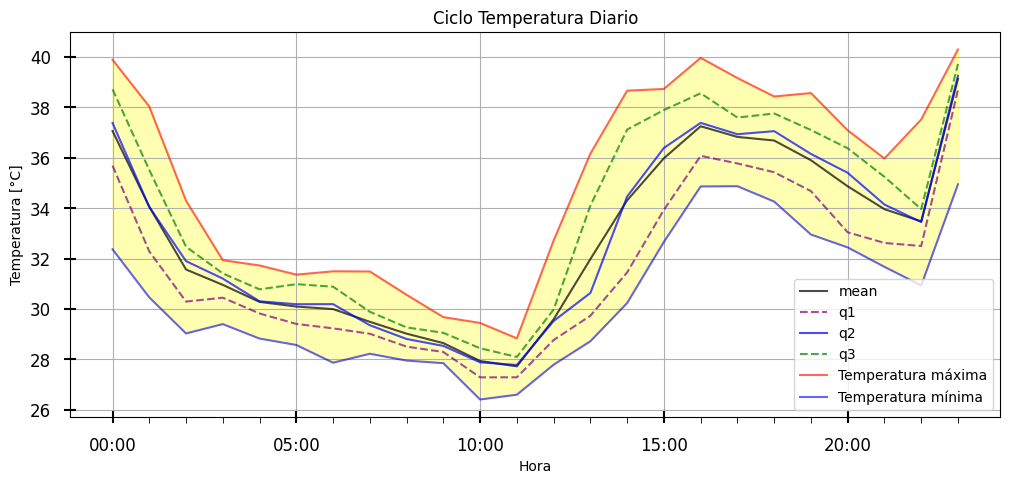

In [114]:
# Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# Graficamos los datos a partir del DataFrame con la función plot de pandas
cuartiles.plot(ax=ax, alpha=0.7, style=["-","--","-","--"], color=["black","purple","blue","green"])

# Graficamos los valores máximos y mínimos
plt.plot(horario_max,'-r', label="Temperatura máxima", alpha=0.6)
plt.plot(horario_min,'-b', label="Temperatura mínima", alpha=0.6)

# Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

# Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo Temperatura Diario")
plt.grid(True)
plt.legend()

plt.show()


* ¿Qué puedes decir de los cuartiles de los datos respecto al promedio?  
* ¿Qué puedes decir de los cuartiles de los datos respecto a los valores máximos y mínimos? 
* ¿Qué dice esto de la representatividad del promedio de cada hora?

### **Diagrama de cajas y bigotes**

Podemos graficar los cuartiles, el promedio y los valores extremos de una forma más clara utilizando un **gráfico de cajas y bigotes**. Para esto, emplearemos la librería [Seaborn](https://seaborn.pydata.org/), la cual es una librería de visualización estadística.

En este gráfico, la caja representa el rango intercuartil (IQR), la línea horizontal dentro de la caja representa la mediana (Q2), los bigotes representan los valores máximos y mínimos, y los puntos representan los valores atípicos. Estos valores máximos y mínimos se calculan como 1.5 veces el rango intercuartil

### **El atributo fontsize**

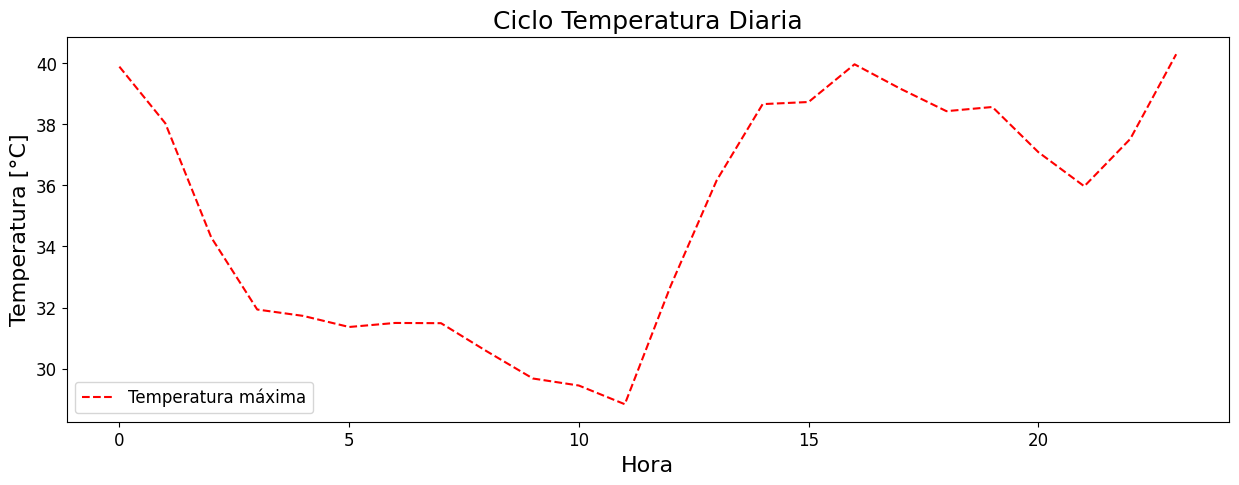

In [123]:
#Generamos la figura
fig = plt.figure(figsize=(15, 5))
ax  = fig.gca()
plt.plot(horario_max,'--r',label="Temperatura máxima")

# Etiquetas
plt.ylabel("Temperatura [°C]",        fontsize=15)
plt.xlabel("Hora",                    fontsize=15)
plt.title("Ciclo Temperatura Diaria", fontsize=18)

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### **Generación de gráficas**

In [124]:
import seaborn as sns

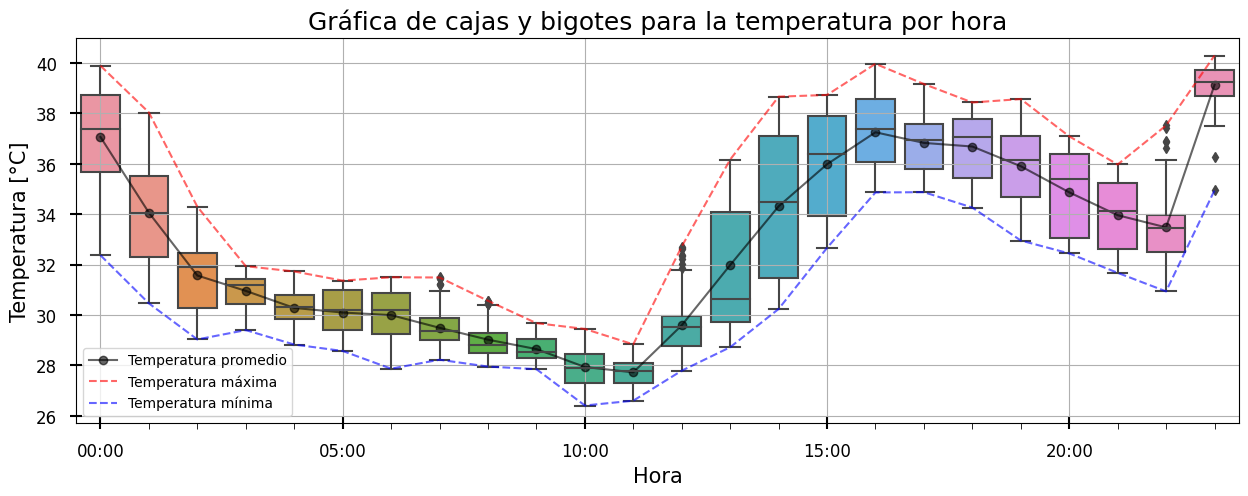

In [127]:
# Generamos la figura
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

# Diagrama cajas y bigotes
sns.boxplot(data = temp, x='hora', y='T_mean', ax=ax)

# Otros graficos
plt.plot(horario,     '-ok', label="Temperatura promedio", alpha=0.6)
plt.plot(horario_max, '--r', label="Temperatura máxima",   alpha=0.6)
plt.plot(horario_min, '--b', label="Temperatura mínima",   alpha=0.6)


# Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"], fontsize=12)

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]", fontsize=15)
plt.xlabel("Hora", fontsize=15)
plt.title("Gráfica de cajas y bigotes para la temperatura por hora", fontsize=18)
plt.legend()
plt.grid(True)

plt.show()

* ¿Qué puedes decir de los valores atípicos?  
* ¿Cómo se relacionan los valores atípicos con los valores máximos y mínimos?  
* ¿Puedes decir que tan representativo es el promedio de cada hora respecto a los datos reales?